In [1]:
# !pip install spotipy

In [2]:
# pip install scikit-learn

In [4]:
#nj - url https://open.spotify.com/playlist/37i9dQZF1EJEENiXSiUJNC?si=4f1e03b41a654958

# birthday - url : https://open.spotify.com/playlist/2j02Hr9EK6CtOj79Yy7XMe?si=9be6775c8a754e48

#playlist ID 
# nj playlist = 37i9dQZF1EJEENiXSiUJNC 
# bday playlist = 2j02Hr9EK6CtOj79Yy7XMe

# client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
# client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

#ran using splinter env

# source splinter/bin/activate

In [5]:

import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='2j02Hr9EK6CtOj79Yy7XMe' 
results = sp.playlist(playlist_id)

In [6]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,6KebNoEtQ4ZYiea7S4m00h,Oi (Sofia Kourtesis Remix),Oi - Sofia Kourtesis Remix,"Catching Flies, Sofia Kourtesis",False,34,0.678,0.816,4,-8.502,...,0.387,0.0948,0.533,120.006,audio_features,spotify:track:6KebNoEtQ4ZYiea7S4m00h,https://api.spotify.com/v1/tracks/6KebNoEtQ4ZY...,https://api.spotify.com/v1/audio-analysis/6Keb...,3.016667,4
1,5Qa679CkfZaEEsLGUBfXFp,Madres,Si Te Portas Bonito,Sofia Kourtesis,False,49,0.715,0.847,6,-9.978,...,0.265,0.2000,0.709,121.981,audio_features,spotify:track:5Qa679CkfZaEEsLGUBfXFp,https://api.spotify.com/v1/tracks/5Qa679CkfZaE...,https://api.spotify.com/v1/audio-analysis/5Qa6...,5.030850,4
2,3bESZhX7qjKExVlTo5lZYt,In2u,In2u,Maya Jane Coles,False,34,0.798,0.706,4,-7.267,...,0.865,0.1060,0.461,124.999,audio_features,spotify:track:3bESZhX7qjKExVlTo5lZYt,https://api.spotify.com/v1/tracks/3bESZhX7qjKE...,https://api.spotify.com/v1/audio-analysis/3bES...,3.360817,4
3,0RwDjtiwRatY6Ai8z5AIna,Whisper (with James Yuill),Whisper (with James Yuill),"Dennis Ferrer, Disciples, James Yuill",False,42,0.739,0.790,10,-6.976,...,0.109,0.0723,0.392,126.007,audio_features,spotify:track:0RwDjtiwRatY6Ai8z5AIna,https://api.spotify.com/v1/tracks/0RwDjtiwRatY...,https://api.spotify.com/v1/audio-analysis/0RwD...,2.667000,4
4,4oS2Gik6Vo9csv7teQsPoG,The Cure & The Cause (Dennis Ferrer Remix),The Cure & The Cause - Dennis Ferrer Remix,"Fish Go Deep, Tracey K, Dennis Ferrer",False,57,0.770,0.751,6,-7.239,...,0.741,0.0720,0.966,125.986,audio_features,spotify:track:4oS2Gik6Vo9csv7teQsPoG,https://api.spotify.com/v1/tracks/4oS2Gik6Vo9c...,https://api.spotify.com/v1/audio-analysis/4oS2...,6.306250,4


In [7]:
#average value for each category

music_feature= features_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.730154,0.762654,-8.472115,0.052635,0.132229,0.543773,0.144754,0.512846,122.960538,4.461783
std,0.104068,0.112294,3.174658,0.020230,0.181925,0.378557,0.089512,0.203407,11.362556,1.622412
min,0.438000,0.537000,-18.451000,0.030400,0.000076,0.000000,0.044700,0.212000,89.963000,2.055850
25%,0.684500,0.694500,-9.740750,0.039400,0.004460,0.109500,0.090525,0.402500,121.988000,3.133783
50%,0.732000,0.775000,-8.287000,0.045850,0.071100,0.766500,0.109500,0.495000,125.006000,4.047125
75%,0.795500,0.860500,-7.197000,0.058925,0.166500,0.860250,0.153750,0.637250,127.005500,5.892617
max,0.920000,0.954000,-2.912000,0.122000,0.710000,0.968000,0.361000,0.966000,149.854000,7.167600


In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

### Creating a Radar Chart
-----


In [18]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib import colormaps
# list(colormaps)

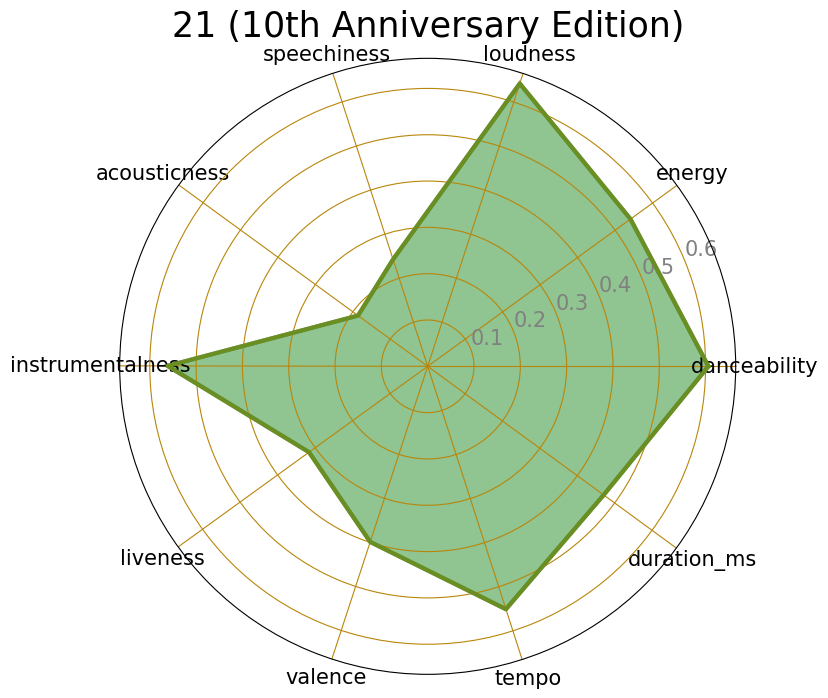

In [44]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
pi= 3.14 # define pi as a numerical variable


# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value, color="olivedrab", lw=3, label="a line")
plt.fill(angles,value,alpha=0.5, facecolor='forestgreen', edgecolor='darkgreen', linewidth=3)


plt.title('21 (10th Anniversary Edition)', size=25)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.tick_params(grid_color='darkgoldenrod')
plt.show()